# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

Approach: 

1. Problem Definition
2. Data
3. Evaluation 
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters about a patient, can we predict whether they have heart disease

## 2. Data
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.
https://archive.ics.uci.edu/ml/datasets/heart+disease
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

## 4. Features

This is where we get information about different features of the data

 ** Create a data dictionary **
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

## Preparing the tools

We're going to use pandas, Matplotlib and Numpy for data analysis and manipulation

In [118]:
#Import all the tools we need

# Regular EDA( Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plots appear inside notebook
%matplotlib inline 

#Import Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve


## Load Data

In [12]:
df = pd.read_csv("data/heart-disease.csv")
df.shape #(rows, columns)



(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with. 

1. What question(s) are you trying to answer? 
2. What data do we have and how do we treat different types?
3. What's missing from the data and how to deal with it?
4. Where are the outliers and how are they accomodated for?
5. How can you add, change or remove features to get more out of our data? 

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [29]:
# This is a relatively balanced problem with respect to target data distribution
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

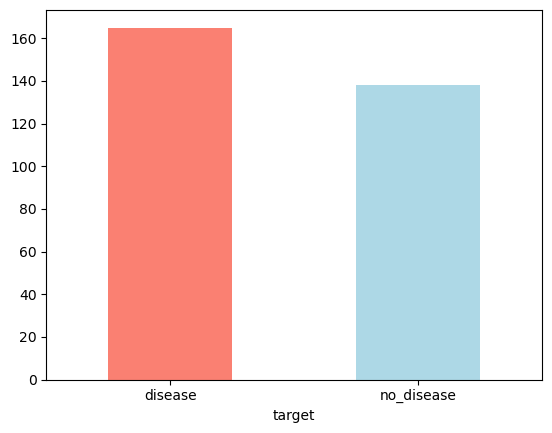

In [30]:
ax = df["target"].value_counts().plot(kind ="bar", color = ["salmon", "lightblue"]);
ax.set_xticklabels(["disease", "no_disease"], rotation=0);

In [32]:
# Checking what data is all about
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [33]:
#Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [34]:
#More description of our data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Compare different columns to each other: 
Figure out patterns of how columns are correlated

1. Comparing age/sex to target

In [37]:
# Female = 0 and Male = 1
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

#Our Dataset is tilted to having more males than fermales

In [40]:
# Compare sex column to target column: 
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


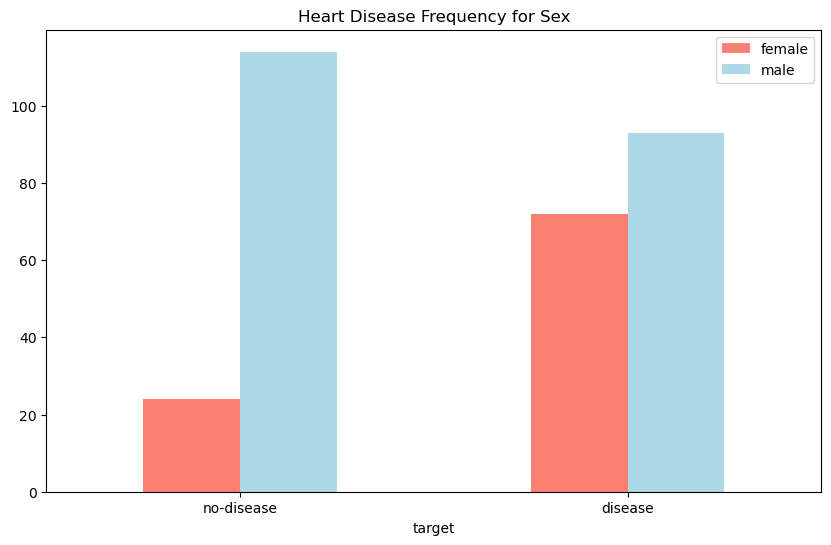

In [47]:
# Create a plot of crosstab
ctab_plot = pd.crosstab(df.target, df.sex).plot(kind = "bar", 
                                   figsize = (10,6), 
                                   color = ["salmon","lightblue"]);

ctab_plot.set_xticklabels(["no-disease", "disease"], rotation=0);
ctab_plot.legend(["female", "male"])
ctab_plot.set_title("Heart Disease Frequency for Sex");

## Age Vs Max Heart rate for heart Disease 
* Try to combine a couple of independent variables to target variable
* compare age, thalach and target

*thalach is max heart rate achieved

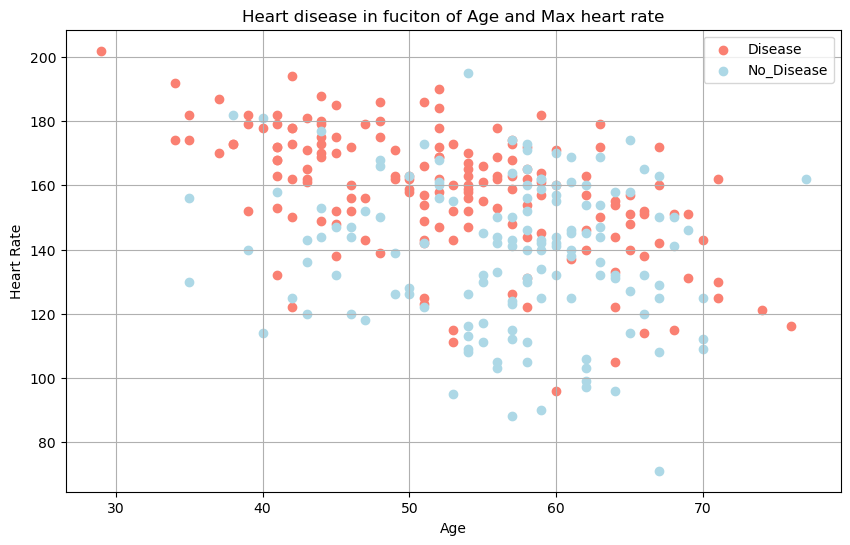

In [55]:
# Create another figure
plt.figure(figsize = (10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1], 
           df.thalach[df.target==1], c="salmon");

# Scatter with negative examples
plt.scatter(df.age[df.target==0], 
           df.thalach[df.target==0], c="lightblue");

# Add some helpful info
plt.title("Heart disease in fuciton of Age and Max heart rate")
plt.xlabel("Age");
plt.ylabel("Heart Rate");
plt.legend(["Disease", "No_Disease"]);
plt.grid(visible=True)

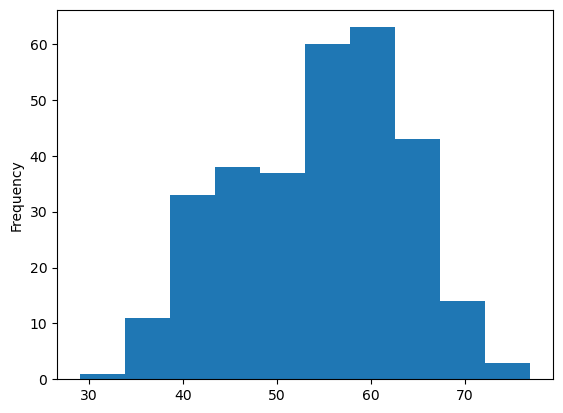

In [56]:
# Check distribution of age with a histogram
df.age.plot.hist();

## Heart Disease Frequency for Chest pain type

* 0: Typical Angina
* 1: Atypical Angina
* 2: Non-anginal pain
* 3: Asymptotic

 (See data legend from source)


In [58]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


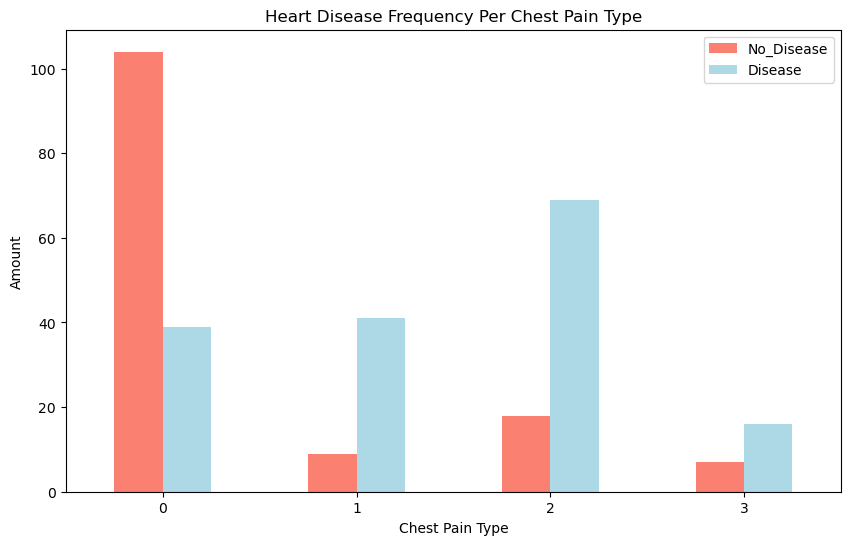

In [68]:
# Make the crosstab more visual

ctab_pt = pd.crosstab(df.cp,df.target).plot(kind = "bar", 
                                           figsize = (10,6), 
                                           color = ["salmon", "lightblue"]);

ctab_pt.set_title("Heart Disease Frequency Per Chest Pain Type");
ctab_pt.set_xlabel("Chest Pain Type");
ctab_pt.set_ylabel("Amount");
ctab_pt.legend(["No_Disease", "Disease"])
ctab_pt.set_xticklabels(["0","1","2","3"], rotation = 0);

In [69]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
#Make a Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


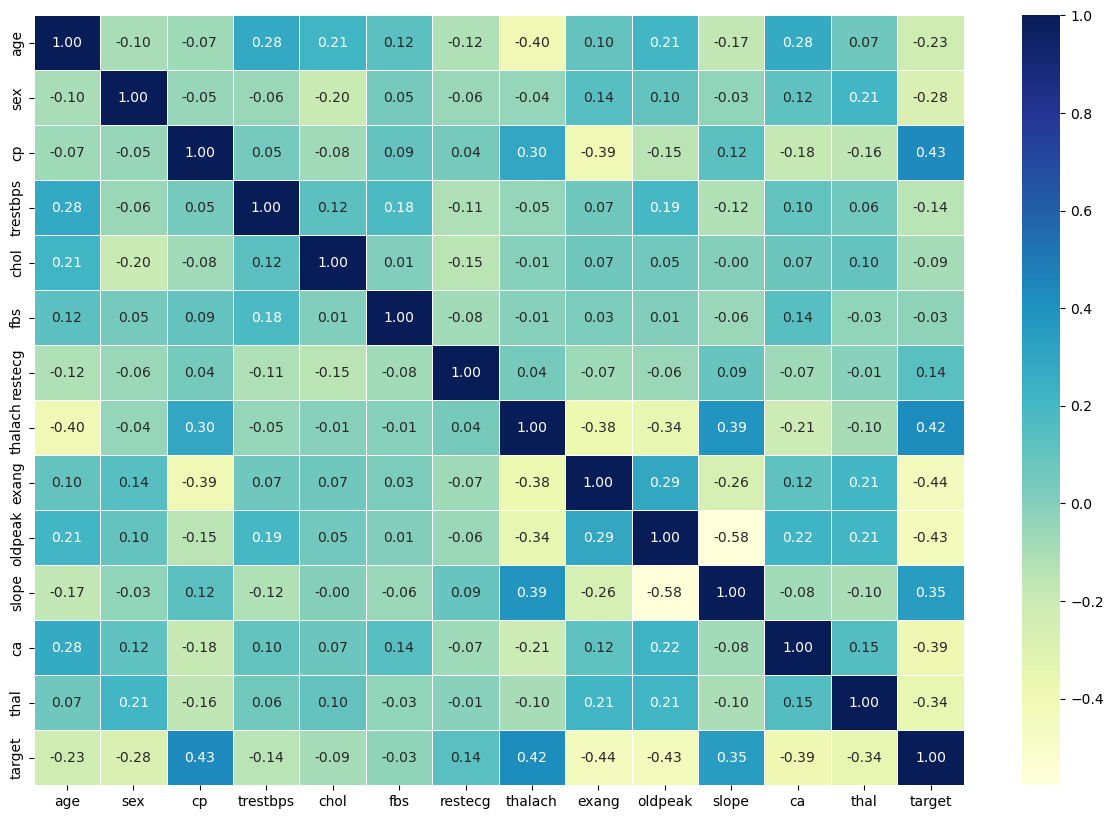

In [77]:
# Let's use a heatmap tp represent correlation
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot= True, 
                linewidth = 0.5, 
                fmt= "0.2f",
                cmap="YlGnBu");


## 5. Modelling

In [78]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
# Split data into X and y
X = df.drop("target", axis = 1)
y = df["target"]

# Split data into Train and test set
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

* Now we've got our data split into train and test sets, it's time to build a Machine Learning Model
* We'll train it (find patterns) on traiing set and
* Test the model(use patterns) on the test set


We're going to try 3 different ML Models: 

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier


In [82]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """Fits and evaluates given machine learning models.
    models  : a dict of different Scikit-Learn ML models
    X_train : training data (no labels)
    X_test. : testing data (no labels)
    y_train : training labels
    y_test  : test labels
    """
    #Set Random seed
    np.random.seed(42)
    
    #Make dictionary to keep model scores
    model_scores = {}
    #Loop through models
    
    for name, model in models.items():
        #Fit model to data
        model.fit(X_train, y_train)
        
        #Evaluate model and append it's score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [83]:
model_scores = fit_and_score(models=models, 
                            X_train = X_train, 
                            X_test = X_test, 
                            y_train = y_train, 
                            y_test = y_test)

model_scores



/Users/paurav/Documents/GitHub/heart-disease-project/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9016393442622951,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.9180327868852459}

## Model Comparison

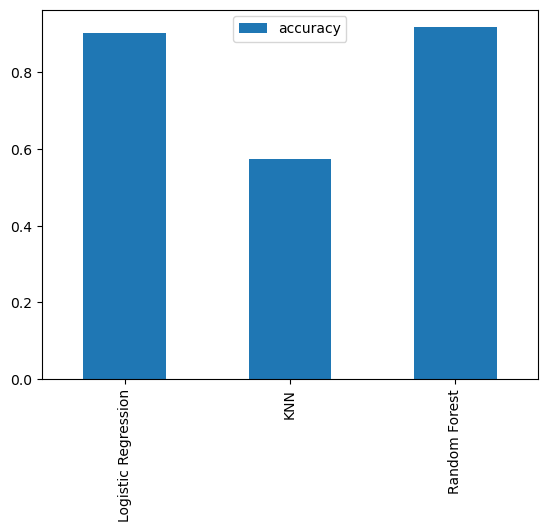

In [86]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model, Let's look at the following
    
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC Curve
* Area under curve (AUC)

### Hyperparameter tuning (by hand)

Maximum KNN Score on the test data: 72.13%
Maximum KNN Score for n_neighbours: 15


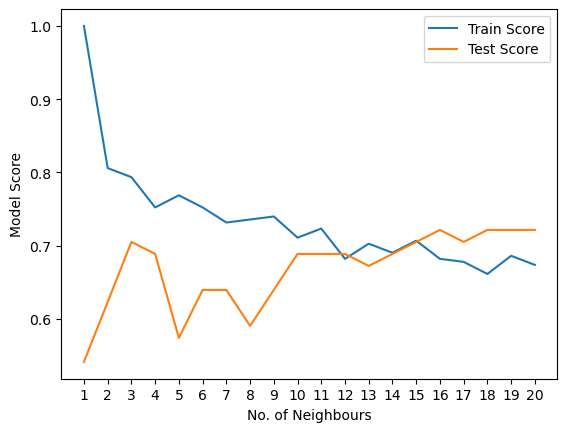

In [93]:
# Tuning KNN

train_scores = []
test_scores = []

# Create a list fo different values for n_neighbours
neighbours = range(1,21)

#Setup KNN instance
knn = KNeighborsClassifier()

#Loop through different n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors = i)
    
    #Fit the algorithm
    knn.fit(X_train, y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update test scores list
    test_scores.append(knn.score(X_test, y_test))
    
plt.plot(neighbours, train_scores, label="Train Score")
plt.plot(neighbours, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("No. of Neighbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on the test data: {max(test_scores)*100:0.2f}%")
print(f"Maximum KNN Score for n_neighbours: {test_scores.index(max(test_scores))}")

At this point we see the KNN model not performing better for a range of tuned values. We will focus on tuning the two other models since they show better baseline results

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune 
* LogisticRegression()
* RandomForestClassifier()
 
 using RandomizedSearchCV() 

In [95]:
# Create a hyperparameter grid for LogisicRegression
log_reg_grid = {"C": np.logspace(-4,4,20), 
               "solver" : ["liblinear"]}

# Create a hyperparemeter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1,20,2)}


Hyperparameter grids are setup for each of our models, now er tune them using RandomizedSearchCV

In [96]:
# Tune LogisticRegression

np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter=20,
                                verbose = True)

#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [97]:
# Find the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 206.913808111479}

In [98]:
# Evaluate the randomized search LogisticRegression model
rs_log_reg.score(X_test, y_test)

0.8688524590163934

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [99]:
#Setup random seed
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                          param_distributions=rf_grid, 
                          cv = 5, 
                          n_iter = 20,
                          verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [100]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [102]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.9180327868852459

In [103]:
model_scores

{'Logistic Regression': 0.9016393442622951,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.9180327868852459}

## Hyperparameter tuning with GridSearchCV

We're going to tune 
* LogisticRegression()
* RandomForestClassifier()
 
 using GridSearchCV()

In [106]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30), 
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), 
                         param_grid=log_reg_grid,
                         cv = 5, 
                         verbose = True)

# Fit grid hyperparameter search model 
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [107]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 17.433288221999874, 'solver': 'liblinear'}

In [108]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8688524590163934

In [110]:
# Different hyperparameters for our RandomForestClassifier
rf_grid = {"n_estimators": np.arange(100,300,50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1,20,2)}

# Setup grid hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(), 
                         param_grid=rf_grid,
                         cv = 5, 
                         verbose = True)

# Fit grid hyperparameter search model 
gs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


In [112]:
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 17,
 'min_samples_split': 12,
 'n_estimators': 250}

In [113]:
gs_rf.score(X_test, y_test)

0.9180327868852459

Looks like the RandomForestClassifier model performs the best among the three

## Evaluate our tuned ML classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions

In [131]:
# Make predictions with tuned model
y_preds = gs_rf.predict(X_test)
y_preds

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [132]:
y_test

113    1
249    0
18     1
142    1
299    0
      ..
64     1
133    1
204    0
180    0
11     1
Name: target, Length: 61, dtype: int64

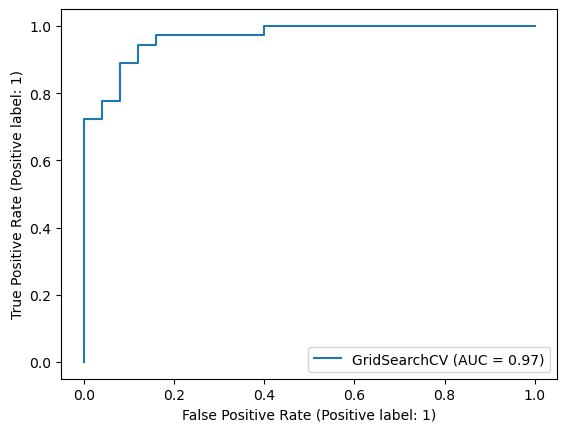

In [133]:
# 1. ROC Curve : Plot of TPR : FPR
RocCurveDisplay.from_estimator(gs_rf,X_test, y_test)

In [134]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[21  4]
 [ 1 35]]


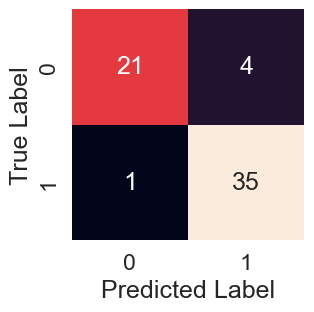

In [135]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_preds):
    """Plots a confusion matrix using Seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                     annot = True, 
                     cbar = False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
plot_conf_mat(y_test, y_preds)

ROC Curve, Confusion matrix and AUC metric presented. Let's get a classification report and a cross validated Precision, Recall and an F1-score

In [136]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.90      0.97      0.93        36

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



Above data is only on one validation data, need above for cross validated data

### Calculate evaluation metrics using cross validation

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using 'cross_val_score()'

In [138]:
# Check best Hyperparameters
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 17,
 'min_samples_split': 12,
 'n_estimators': 250}

In [139]:
# Create a new classifier with best params
rf_clf = RandomForestClassifier(max_depth= 5,
  min_samples_leaf= 17,
  min_samples_split = 12,
  n_estimators = 250)

In [143]:
# Cross-validated accuracy
cv_acc = cross_val_score(rf_clf, X, y, cv = 5, scoring="accuracy")
cv_acc_mean = np.mean(cv_acc)
cv_acc_mean

0.8414754098360657

In [144]:
# Cross-validated precision
cv_prec = cross_val_score(rf_clf, X, y, cv = 5, scoring="precision")
cv_prec_mean = np.mean(cv_prec)
cv_prec_mean

0.8284762402409462

In [145]:
# Cross-validated recall
cv_recall = cross_val_score(rf_clf, X, y, cv = 5, scoring="recall")
cv_recall_mean = np.mean(cv_recall)
cv_recall_mean

0.8909090909090909

In [146]:
# Cross-validated f1
cv_f1 = cross_val_score(rf_clf, X, y, cv = 5, scoring="f1")
cv_f1_mean = np.mean(cv_f1)
cv_f1_mean

0.8519723568239714

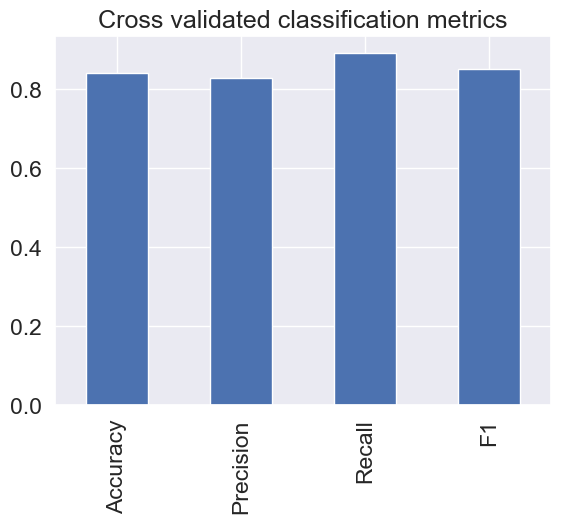

In [148]:
# Visualize our cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc_mean, 
                           "Precision" : cv_prec_mean,
                           "Recall" : cv_recall_mean, 
                           "F1" : cv_f1_mean},
                          index=[0])

cv_metrics.T.plot.bar(title = "Cross validated classification metrics", 
                             legend = False);

### Feature Importance

Feature importance presents which features contributed the most to the outcomes of the model and how did they contribute.

Finding feature importance is different for each ML model

In [149]:
# Check best Hyperparameters
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 17,
 'min_samples_split': 12,
 'n_estimators': 250}

In [150]:
# Create a new classifier with best params
rf_clf = RandomForestClassifier(max_depth= 5,
  min_samples_leaf= 17,
  min_samples_split = 12,
  n_estimators = 250)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=17, min_samples_split=12,
                       n_estimators=250)

In [151]:
#Check feature_importance 
rf_clf.feature_importances_

array([0.04069927, 0.03799087, 0.17827011, 0.0124685 , 0.02400273,
       0.        , 0.00854009, 0.12785173, 0.07470001, 0.12599144,
       0.06713675, 0.12539527, 0.17695325])

In [168]:
# Match the feature importances to columns
feature_dict = dict(zip(df.columns, (rf_clf.feature_importances_)))
feature_dict

{'age': 0.04069927084892486,
 'sex': 0.03799086537535968,
 'cp': 0.1782701063580763,
 'trestbps': 0.012468496340280143,
 'chol': 0.024002730540821197,
 'fbs': 0.0,
 'restecg': 0.008540086808761891,
 'thalach': 0.1278517290480392,
 'exang': 0.0747000118292765,
 'oldpeak': 0.12599143652667652,
 'slope': 0.06713675199008097,
 'ca': 0.1253952658406102,
 'thal': 0.17695324849309246}

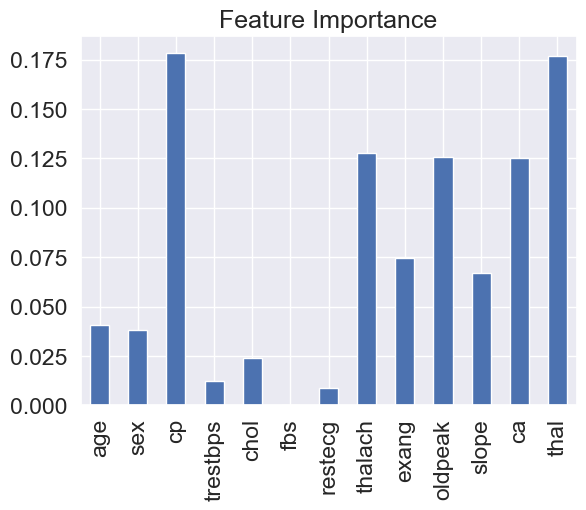

In [170]:
# Visualze feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False);

## 6. Experimentation and Future work

* Collect more data
* Try a better model (like CatBoost or XGBoost)
* Improve current models (beyond what is done above)
* Export model and share with others